Word embeddings are a modern approach for representing text in natural language processing.

Word embedding algorithms like word2vec and GloVe are key to the state-of-the-art results achieved by neural network models on natural language processing problems like machine translation.

**Develop Word2Vec Embedding**

Word2vec is one algorithm for learning a word embedding from a text corpus.

There are two main training algorithms that can be used to learn the embedding from text; they are continuous bag of words (CBOW) and skip grams

In [0]:
import gensim

In [0]:
from gensim.models import Word2Vec
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]

In [0]:
# train model
model = Word2Vec(sentences, min_count=1)#min_count =words with an occurrence less than this count will be ignored.

In [5]:
print(model)

Word2Vec(vocab=14, size=100, alpha=0.025)


In [7]:
# summarize vocabulary
words = list(model.wv.vocab)
print(words)

['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec', 'second', 'yet', 'another', 'one', 'more', 'and', 'final']


In [8]:
# access vector for one word
print(model['sentence'])

[-8.7833428e-04 -3.0705845e-03 -2.9837175e-03  2.2823904e-03
  2.1324775e-03 -7.1147730e-04  3.0854701e-03 -1.1974341e-03
 -4.6149576e-03 -1.8723989e-03 -1.3843878e-03 -2.7626937e-03
 -1.4045205e-03  2.3145287e-03  3.8007027e-04  3.7332741e-03
 -1.4524154e-03 -8.6394831e-04  2.1399339e-03 -1.2210693e-03
  3.8823983e-04  3.6998664e-03  4.5266901e-05  1.9871369e-03
  3.7181764e-03  2.1078903e-03 -2.5785973e-03  1.4718130e-03
 -4.7844783e-03 -1.9379825e-04 -3.2163746e-04 -4.6062637e-03
  2.1534394e-03 -1.0157921e-03 -4.4254633e-03 -2.6221301e-03
 -3.1451480e-03 -3.8511953e-03  3.4906454e-03  3.1451466e-03
 -3.1903472e-03  2.3402122e-03  4.4555743e-03  2.0272993e-03
 -5.4736872e-04 -1.3916737e-03 -3.2611922e-04  4.6349140e-03
  4.8332233e-03 -2.4265584e-03 -9.9281385e-04 -1.3907164e-03
 -6.9704780e-04  3.1419285e-03 -2.8319187e-03  4.1100043e-03
  4.1339397e-03 -2.6644550e-03  1.2419461e-03  4.9205287e-03
 -3.6929324e-03 -4.3407059e-03  1.7662752e-04  3.3113367e-03
  1.8300340e-03 -3.94638

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [9]:
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=14, size=100, alpha=0.025)


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [10]:
! ls

model.bin  sample_data


In [12]:
# retrieve all the vecctors for trained models
X = model[model.wv.vocab]
print(X)

[[-8.8868052e-05  1.6680054e-03  2.3551183e-03 ... -4.6818634e-03
   3.8932923e-03 -1.5817009e-03]
 [ 2.5179001e-04 -4.5273718e-03 -6.9095299e-04 ...  9.1037014e-04
   1.6006536e-03 -2.3916133e-03]
 [ 2.3331651e-03 -9.7907148e-04  3.5010960e-03 ...  4.7147102e-03
   3.9566825e-03  1.9426316e-03]
 ...
 [-2.3204500e-03  1.5118754e-03  2.5784238e-03 ...  3.1189725e-03
   4.3717739e-03 -6.7605819e-05]
 [ 1.3831158e-03 -4.8627960e-03  4.5803678e-03 ...  2.3754868e-03
  -2.7438460e-03  4.0859333e-04]
 [ 1.8093364e-03 -2.1408753e-04  4.1136551e-03 ... -3.9608786e-03
   1.4076964e-03  3.2058477e-03]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [16]:
#Plot Word Vectors Using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
result = pca.fit_transform(X)
result.shape

(14, 2)

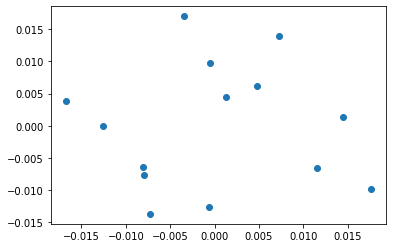

In [18]:
import matplotlib.pyplot as plt # plotting vector 
plt.scatter(result[:, 0], result[:, 1])

In [20]:
words= list(model.wv.vocab)
words[:2]

['this', 'is']

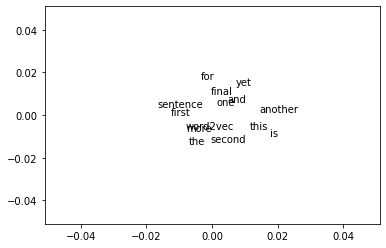

In [32]:
fig = plt.gcf()
for i, word in enumerate(words):
	plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.margins(0.01)
plt.show()

In [33]:
model.wv.most_similar('this')# to checking most simila words

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('is', 0.19210900366306305),
 ('final', 0.1783994734287262),
 ('second', 0.10458189994096756),
 ('another', 0.09968544542789459),
 ('the', 0.04811866953969002),
 ('and', 0.026386933401226997),
 ('more', 0.004181293770670891),
 ('one', 0.002925567328929901),
 ('word2vec', -0.0031542405486106873),
 ('yet', -0.007768359035253525)]

In [34]:
model.wv.similarity(w1='sentence',w2= 'first')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.21286987